In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import Cleaner as cl

dataset = cl.get_and_clean_df('../data/bilhandel_unclean.csv')

dataset = dataset[dataset['Make'] == 'Mazda']

# dataset = pd.read_csv('cars.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
score = regressor.score(X_test,y_test)
display(score)
display(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1) ), 1))
display(dataset)
display(X[0])

0.8344923126164558

array([[ 99143.17, 112500.  ],
       [131867.05,  79900.  ],
       [192807.19, 169800.  ],
       [156653.41, 134900.  ],
       [ 58847.41,  89900.  ],
       [235187.42, 139400.  ],
       [223146.33, 329900.  ],
       [115639.94, 109900.  ],
       [258668.46, 333200.  ],
       [195061.07, 172900.  ],
       [ 96403.06,  81900.  ],
       [188606.69, 179900.  ],
       [263547.72, 234900.  ],
       [ 93044.56,  84800.  ],
       [212259.94, 212000.  ],
       [ 65645.43,  32000.  ],
       [224187.95, 228900.  ],
       [253589.49, 329800.  ],
       [ 73032.61,  49900.  ],
       [158772.49, 154800.  ],
       [ 72389.7 ,  44800.  ],
       [ 11444.09,  32900.  ],
       [ 75633.02,  84900.  ],
       [341358.48, 369800.  ],
       [ 84434.14,  79900.  ],
       [264588.63, 244995.  ],
       [-66472.74,   9500.  ],
       [115391.01, 119900.  ],
       [ 74393.95,  99900.  ],
       [ 65353.87, 120000.  ],
       [ 29677.47,  19900.  ],
       [147733.22, 149900.  ],
       [

,Make,Brændstoftype,Gearkasse,Model,Kilometer,Årgang,Hestekræfter,Antal døre,Antal gear,Km/l,0 - 100 km/t,Tophastighed,Vægt,Grøn Ejerafgift,Nypris,Pris
197,Mazda,Benzin,Automatisk,CX-3,85000,2016,120,5,6,17.2,9.9,187.0,1.198,1.88,290998.0,179500
280,Mazda,Benzin,Manuel,3,339000,2009,105,5,5,15.9,12.2,184.0,1.155,2.52,218049.0,24900
297,Mazda,Benzin,Manuel,3,37000,2014,165,5,6,17.2,8.2,210.0,1.295,1.88,266997.0,149700
334,Mazda,Benzin,Automatisk,CX-5,9000,2020,165,5,6,16.7,9.8,192.0,1.484,2.38,435918.0,399700
381,Mazda,Benzin,Manuel,5,140000,2010,146,5,6,12.7,10.2,194.0,1.485,4.36,312990.0,79900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19595,Mazda,Benzin,Automatisk,2,28000,2015,90,5,6,20.8,12.0,177.0,975.000,660.00,175620.0,149900
19682,Mazda,Benzin,Manuel,3,116000,2013,165,5,6,17.2,8.2,210.0,1.295,1.88,293392.0,125000
19841,Mazda,Benzin,Manuel,3,145000,2011,105,4,5,15.4,12.2,184.0,1.155,2.52,224999.0,59900
19861,Mazda,Benzin,Manuel,6,78000,2002,141,5,5,11.8,9.9,206.0,1.300,4.96,281989.0,29900


array([0, 0, 0, 6, 85000, 2016, '120', '5', '6', 17.2, 9.9, 187.0, 1.198,
       1.88, 290998.0], dtype=object)

In [28]:

display(regressor.predict([[40, 0, 1, 444, 157000, 2009, '102', '5', '5', 16.4, 10.0, 185.0,
       975.0, 2.52, 169990.0]]))


UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

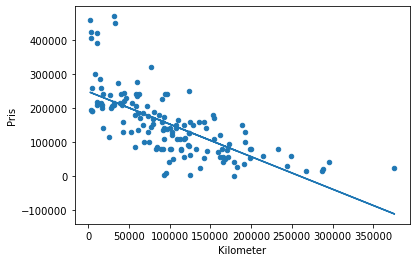

In [7]:
# Plot with km versus price

pd_km_price = dataset[dataset['Make'] == 'Mazda'][['Kilometer', 'Pris']]

pd_km_price.plot.scatter(x='Kilometer', y='Pris')
m, b = np.polyfit(pd_km_price['Kilometer'].values, pd_km_price['Pris'].values, 1)
plt.plot(pd_km_price['Kilometer'].values, m*pd_km_price['Kilometer'].values+b)


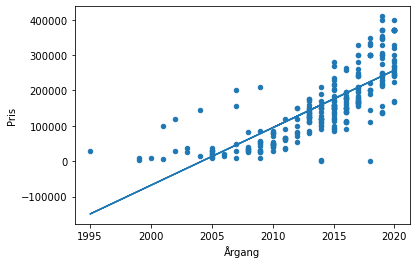

In [22]:
# Plot with km versus price

pd_year_price = dataset[dataset['Make'] == 'Mazda'][['Årgang', 'Pris']]


pd_year_price.plot.scatter(x='Årgang', y='Pris')
m, b = np.polyfit(pd_year_price['Årgang'].values, pd_year_price['Pris'].values, 1)
plt.plot(pd_year_price['Årgang'].values, m*pd_year_price['Årgang'].values+b)
